<a href="https://colab.research.google.com/github/divyanshuraj6815/eva/blob/master/Project%201/Assignment_1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages

import cv2
import numpy as np
from urllib.request import urlopen
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
class edge_detector (object):
  
  #initialize variables with image data
  def __init__ (self, image_url):
    try:
      self.url = image_url
      self.resp = urlopen (self.url)
      self.image = np.asarray(bytearray(self.resp.read()), dtype="uint8")
      self.image = cv2.imdecode(self.image, cv2.IMREAD_COLOR)
      print ('Original Image : ')
      cv2_imshow (self.image)
      self.error_flag = 0
    except Exception as e:
      self.error_flag = -1
      print ('__init__', e)
  
  #pre defined canny edge detection
  def canny_edge_detector (self):
    try:
      if self.error_flag == -1:
        print ('Cannot apply canny edge : Error in downloading Image')
        return
      edges = cv2.Canny (self.image,100,200)
      print ('Canny Edge Detection : ')
      cv2_imshow(edges)
      print ('################################################################')
    except Exception as e:
      print ('canny_edge_detector', e)
  
  #edge detection via manual kernels
  def manual_kernel (self, kernel, tag):
    try:
      if self.error_flag == -1:
        print ('Cannot apply manual kernel : Error in downloading Image')
        return
      dst = cv2.filter2D (self.image,-1,kernel)
      print ('%s Kernel %s Edge Detection : ' % (kernel, tag))
      cv2_imshow(dst)
      print ('################################################################')
    except Exception as e:
      print ('manual_kernel', e)
  
  #process a given list of kernels over the image
  def process_list (self, list_of_kernels):
    try:
      if self.error_flag == -1:
        print ('Cannot apply process list kernel : Error in downloading Image')
        return
      for tag, kernels in list_of_kernels.items():
        for kernel in kernels:
          self.manual_kernel (kernel, tag)
    except Exception as e:
      print ('process_list', e)
      

In [0]:
#pre-defined list of kernels for various operations
list_of_kernels = {

    #Horizontal Edge Detection
    'horizontal' : [
                  np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
    ],

    #Vertical Edge Detection
    'vertical' : [
                  np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])
    ],
    
    #45 degree Edge Detection
    '45 degree' : [
                  np.float32([[-1,-1,2],[-1,2,-1],[2,-1,-1]]),
                  np.float32([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
    ],

    #blur the image
    'blur' : [
                  np.float32([[0,-1,0],[-1,6,-1],[0,-1,0]]),
                  np.float32([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
    ],
    
    'identity' : [
                np.float32([[0,0,0],[0,1,0],[0,0,0]])
    ]
}

#list of images for testing
list_of_images = ['https://d1q9qhpdr6ehzh.cloudfront.net/2dca1c896693e3612de7c873e2298037', 'https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png']

Original Image : 


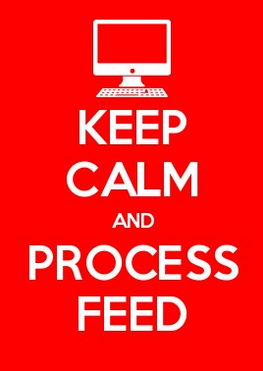

Canny Edge Detection : 


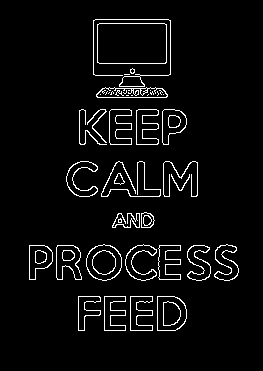

################################################################
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]] Kernel pre-mentioned Edge Detection : 


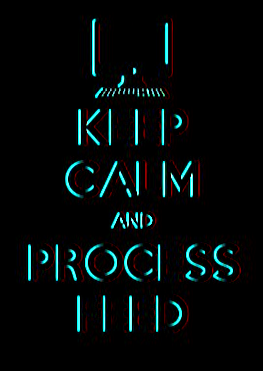

################################################################
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]] Kernel horizontal Edge Detection : 


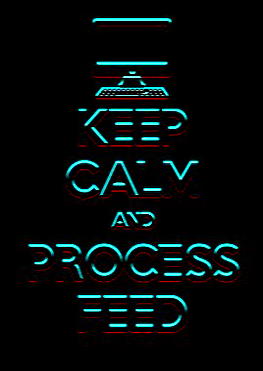

################################################################
[[-1.  0.  1.]
 [-1.  0.  1.]
 [-1.  0.  1.]] Kernel vertical Edge Detection : 


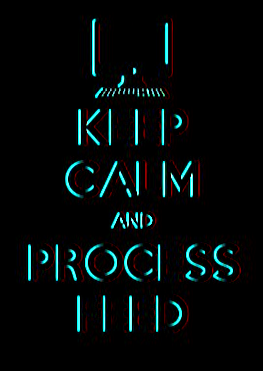

################################################################
[[-1. -1.  2.]
 [-1.  2. -1.]
 [ 2. -1. -1.]] Kernel 45 degree Edge Detection : 


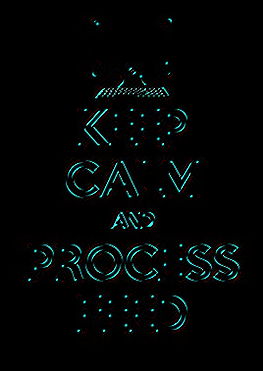

################################################################
[[ 2. -1. -1.]
 [-1.  2. -1.]
 [-1. -1.  2.]] Kernel 45 degree Edge Detection : 


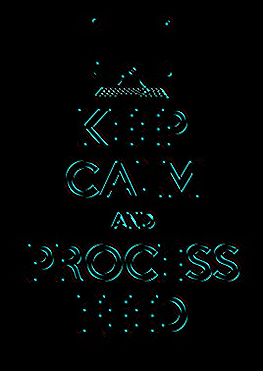

################################################################
[[ 0. -1.  0.]
 [-1.  6. -1.]
 [ 0. -1.  0.]] Kernel blur Edge Detection : 


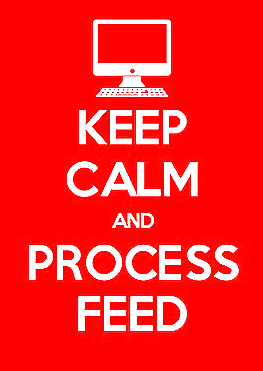

################################################################
[[-1. -1. -1.]
 [-1.  9. -1.]
 [-1. -1. -1.]] Kernel blur Edge Detection : 


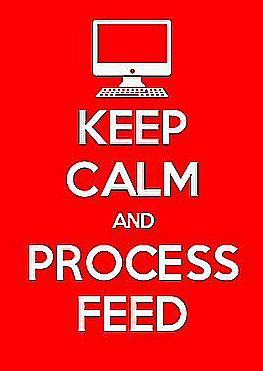

################################################################
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]] Kernel identity Edge Detection : 


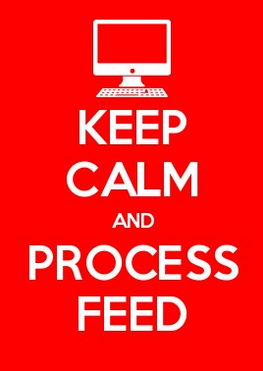

################################################################


In [70]:
if __name__ == '__main__':
  O = edge_detector (list_of_images[0])

  #Pre-Mentioned
  O.canny_edge_detector ()
  O.manual_kernel (np.float32([[-1,0,1],[-1,0,1],[-1,0,1]]), 'pre-mentioned')
  O.process_list (list_of_kernels)